# JOB-A-THON - September 2021

## Pulkit Khandelwal

### Importing Libraries

In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading Data

In [331]:
train_df = pd.read_csv('TRAIN.csv')

In [332]:
test_df = pd.read_csv('TEST_FINAL.csv')

In [333]:
train_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


## Exploratory Data Analysis

### Information about the dataset

In [334]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [335]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


### Statistical Description about the dataset

In [336]:
train_df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [337]:
test_df.describe()

,Store_id,Holiday
count,22265.000000,22265.000000
mean,183.000000,0.032787
std,105.368395,0.178082
min,1.000000,0.000000
25%,92.000000,0.000000
50%,183.000000,0.000000
75%,274.000000,0.000000
max,365.000000,1.000000


### Finding if Missing Values?

In [338]:
train_df.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [339]:
test_df.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

No missing values found !

### Shape of Dataset

In [340]:
train_df.shape

(188340, 10)

In [341]:
test_df.shape

(22265, 8)

### Columns

In [342]:
train_df.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [343]:
test_df.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount'],
      dtype='object')

[]

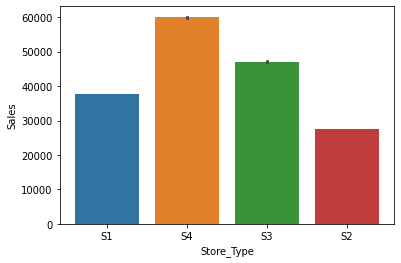

In [344]:
ax = sns.barplot(x="Store_Type", y="Sales", data=train_df)
plt.plot()

**S4 has higher sales**

[]

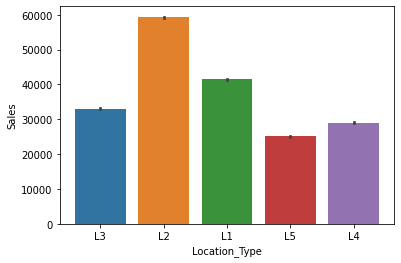

In [345]:
ax = sns.barplot(x="Location_Type", y="Sales", data=train_df)
plt.plot()

**L2 has higher sales**

[]

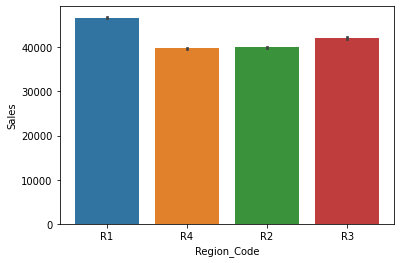

In [347]:
ax = sns.barplot(x="Region_Code", y="Sales", data=train_df)
plt.plot()

**All regions almost has equal some amount of salaries**

[]

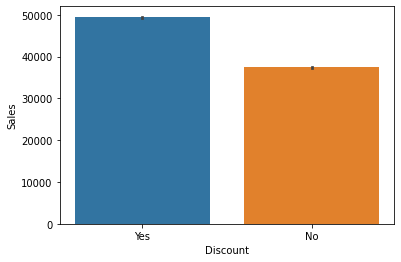

In [350]:
ax = sns.barplot(x=train_df['Discount'], y=train_df['Sales'])
plt.plot()

**Sales increased when there is a discount**

## Data Preprocessing

### Dropping Columns

In [277]:
train_df.drop(['ID','#Order','Date'],axis=1,inplace=True)
test_df.drop(['ID','Date'],axis=1,inplace=True)

### Handling Categorical Variables

In [278]:
from sklearn.preprocessing import LabelEncoder

In [279]:
encoder = LabelEncoder()

for i in train_df.columns: 
    if train_df[i].dtype == 'object': 
        encoder.fit(list(train_df[i].values)) 
        train_df[i] = encoder.transform(train_df[i].values)
         
for j in train_df.columns: 
    if train_df[j].dtype == 'int':
        train_df[j] = train_df[j].astype('float64')

In [280]:
train_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,1.0,0.0,2.0,0.0,1.0,1.0,7011.84
1,253.0,3.0,1.0,0.0,1.0,1.0,51789.12
2,252.0,2.0,1.0,0.0,1.0,1.0,36868.20
3,251.0,1.0,2.0,0.0,1.0,1.0,19715.16
4,250.0,1.0,2.0,3.0,1.0,1.0,45614.52


In [281]:
for k in test_df.columns: 
    if test_df[k].dtype == 'object': 
        encoder.fit_transform(list(test_df[k].values))
        test_df[k] = encoder.transform(test_df[k].values) 
         
for m in test_df.columns: 
    if test_df[m].dtype == 'int':
        test_df[m] = test_df[m].astype('float64') 

In [282]:
test_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount
0,171.0,3.0,1.0,2.0,0.0,0.0
1,172.0,0.0,0.0,0.0,0.0,0.0
2,173.0,3.0,1.0,0.0,0.0,0.0
3,174.0,0.0,0.0,3.0,0.0,0.0
4,170.0,0.0,0.0,1.0,0.0,0.0


### Analyzing data in columns

In [283]:
train_df['Store_Type'].value_counts()

0.0    88752
3.0    45924
1.0    28896
2.0    24768
Name: Store_Type, dtype: int64

In [284]:
train_df['Region_Code'].value_counts()

0.0    63984
1.0    54180
2.0    44376
3.0    25800
Name: Region_Code, dtype: int64

In [285]:
train_df['Holiday'].value_counts()

0.0    163520
1.0     24820
Name: Holiday, dtype: int64

In [286]:
train_df['Discount'].value_counts()

0.0    104051
1.0     84289
Name: Discount, dtype: int64

## Model Building

In [287]:
X = train_df.drop(['Sales'],axis=1)
y = train_df['Sales']

### Train Test Splitting of Training Data

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Random Forest Algorithm

In [290]:
from sklearn.ensemble import RandomForestRegressor

In [248]:
model = RandomForestRegressor()

#### HyperParameter Tuning

In [292]:
from sklearn.model_selection import RandomizedSearchCV

In [291]:
rf_grid={"n_estimators":np.arange(10,1000,200),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [294]:
rs_rf=RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                              verbose=2)

In [295]:
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=610, min_samples_split=12, min_samples_leaf=15, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=610, min_samples_split=12, min_samples_leaf=15, max_depth=10, total=  35.6s
[CV] n_estimators=610, min_samples_split=12, min_samples_leaf=15, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.6s remaining:    0.0s


[CV]  n_estimators=610, min_samples_split=12, min_samples_leaf=15, max_depth=10, total=  35.6s
[CV] n_estimators=610, min_samples_split=12, min_samples_leaf=15, max_depth=10 
[CV]  n_estimators=610, min_samples_split=12, min_samples_leaf=15, max_depth=10, total=  35.4s
[CV] n_estimators=610, min_samples_split=12, min_samples_leaf=15, max_depth=10 
[CV]  n_estimators=610, min_samples_split=12, min_samples_leaf=15, max_depth=10, total=  35.0s
[CV] n_estimators=610, min_samples_split=12, min_samples_leaf=15, max_depth=10 
[CV]  n_estimators=610, min_samples_split=12, min_samples_leaf=15, max_depth=10, total=  35.4s
[CV] n_estimators=410, min_samples_split=8, min_samples_leaf=11, max_depth=5 
[CV]  n_estimators=410, min_samples_split=8, min_samples_leaf=11, max_depth=5, total=  16.5s
[CV] n_estimators=410, min_samples_split=8, min_samples_leaf=11, max_depth=5 
[CV]  n_estimators=410, min_samples_split=8, min_samples_leaf=11, max_depth=5, total=  16.7s
[CV] n_estimators=410, min_samples_spl

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 36.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [298]:
#Training Accuracy
rs_rf.score(X_train,y_train)

0.6578454111751368

In [309]:
#Testing Accuracy
rs_rf.score(X_test,y_test)

0.6475681000165321

In [310]:
#Best Parameters
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 19,
 'min_samples_split': 16,
 'n_estimators': 410}

### Evaluation Metrics

In [323]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error

In [325]:
#Predictions
y_preds = rs_rf.predict(X_test)

In [303]:
r2_score(y_preds,y_test)

0.4684447949291277

In [304]:
mean_absolute_error(y_preds,y_test)

7633.744774126816

In [305]:
mean_squared_error(y_preds,y_test)

119148269.12010682

In [306]:
np.sqrt(mean_squared_error(y_preds,y_test))

10915.505903076908

In [307]:
mean_squared_log_error(y_preds,y_test)

0.09914557809906273

## Model Building on Full Data

In [322]:
#Fitting the model with tuned params
model = RandomForestRegressor(max_depth=None,min_samples_leaf=19,min_samples_split=16,n_estimators=410)

In [312]:
model.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=19,
                      min_samples_split=16, min_weight_fraction_leaf=0.0,
                      n_estimators=410, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [313]:
model.score(X,y)

0.6576767411067733

## Predictions

In [314]:
test_df_preds = model.predict(test_df)

## Sample Submission

In [315]:
sample_submission = pd.read_csv('SAMPLE.csv')

In [316]:
sample_submission.head()

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275


In [317]:
sample_submission['Sales'] = test_df_preds

In [318]:
sample_submission.head()

,ID,Sales
0,T1188341,48523.259985
1,T1188342,35890.777399
2,T1188343,70520.493712
3,T1188344,33035.682786
4,T1188345,36185.318223


In [319]:
sample_submission.to_csv('random_forest_tuned_submission.csv',index=False)

## Saving the Trained Model

In [320]:
#loading the package pickle
import pickle

In [321]:
#saving the trained model into a pkl binary file
file = open('sales_prediction_model.pkl','wb')
pickle.dump(model,file)